In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.models import load_model
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import EarlyStopping
import numpy as np

c:\users\patri\anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
c:\users\patri\anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
c:\users\patri\anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [8]:
model = Sequential()

n_cols = X_train.shape[1]

model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
trainingModel = model.fit(X_train, Y_train, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 2s 49us/step - loss: 0.3389 - acc: 0.9023 - val_loss: 0.1885 - val_acc: 0.9452
Epoch 2/30
42000/42000 [==============================] - 2s 41us/step - loss: 0.1572 - acc: 0.9536 - val_loss: 0.1710 - val_acc: 0.9494
Epoch 3/30
42000/42000 [==============================] - 2s 44us/step - loss: 0.1190 - acc: 0.9640 - val_loss: 0.1512 - val_acc: 0.9551
Epoch 4/30
42000/42000 [==============================] - 2s 46us/step - loss: 0.0955 - acc: 0.9706 - val_loss: 0.1478 - val_acc: 0.9560
Epoch 5/30
42000/42000 [==============================] - 2s 40us/step - loss: 0.0803 - acc: 0.9746 - val_loss: 0.1251 - val_acc: 0.9637
Epoch 6/30
42000/42000 [==============================] - 2s 40us/step - loss: 0.0686 - acc: 0.9789 - val_loss: 0.1304 - val_acc: 0.9636
Epoch 7/30
42000/42000 [==============================] - 2s 41us/step - loss: 0.0568 - acc: 0.9820 - val_loss: 0.1325 - val_acc

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [11]:
print("Test score:", score[0])
print("Test accuracy:", score[1])

Test score: 0.10899198375890265
Test accuracy: 0.9673


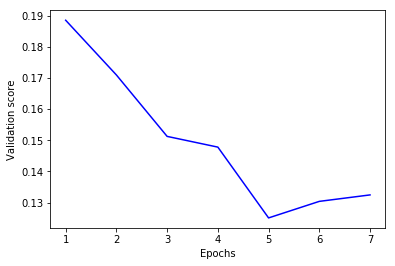

In [12]:
plt.plot(range(1, len(trainingModel.history["val_loss"])+1), trainingModel.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [13]:
predicted_classes = model.predict_classes(X_test)

correct = np.nonzero(predicted_classes == y_test)[0]
incorrect = np.nonzero(predicted_classes != y_test)[0]

In [14]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [15]:
model.save("numberModel.h5")